In [1]:
import pandas as pd
from darts import TimeSeries
from darts.metrics.metrics import rmse
from darts.dataprocessing.transformers import Scaler
# from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel, NBEATSModel, RandomForest, NHiTSModel

In [2]:
cutoff_year = "2022"

In [3]:
data = pd.read_excel('../data/Actualandtarget_1401_10.xlsx')

In [4]:
data["Actuals"]

0       637791.99
1      1043269.72
2       576363.95
3       683077.75
4      1662274.72
          ...    
692    1534149.72
693    1066567.17
694     281890.65
695     288382.87
696     227790.96
Name: Actuals, Length: 697, dtype: float64

In [5]:
data['BrokerTarget'].isnull().sum()

278

In [6]:
data.isnull()

ProfId  Broker  FiscalYear  Actuals  BrokerTarget
0     False   False       False    False         False
1     False   False       False    False         False
2     False   False       False    False         False
3     False   False       False    False         False
4     False   False       False    False         False
..      ...     ...         ...      ...           ...
692   False   False       False    False         False
693   False   False       False    False         False
694   False   False       False    False         False
695   False   False       False    False         False
696   False   False       False    False         False

[697 rows x 5 columns]

In [7]:
sorted(data['Broker'].unique())

['Algrim, Phillip',
 'Altman, Cribb',
 'Andrew, Megan',
 'Angelle, Tiffany',
 'Ankenbrand, Kimarie',
 'Armstrong, Brooke',
 'Aziewicz, Karolina',
 'Barnes, Joe',
 'Barrett, David',
 'Bernet, Phoebe',
 'Berzina, David',
 'Biggs, Gregory',
 'Birnbach, Maggie',
 'Blount, Robert',
 'Bowles, Reese',
 'Breen, Daniel',
 'Briggs, Thomas',
 'Brower, Brandon',
 'Brown, Breanne',
 'Brownlee, John',
 'Burt, Harrison',
 'Carignan, Douglas',
 'Carrier, Angela',
 'Cash, Graham',
 'Cheek, Jason',
 'Coe, Clint',
 'Cole, Zane',
 'Comby, Kodie',
 'Cornwell, Andrew',
 'Cosby, Russell',
 'Coutu, Brandon',
 'Curry, Ashley',
 'Darrow, Terry',
 'Davidson, Rose',
 'Davis, Kade',
 'Dickerson, Taylor',
 'Dodson, Jason',
 'Doggett, Jon',
 'Eckert, Jeff',
 'Esquivel, James',
 'Ford, Elizabeth',
 'Forkner, Fiona',
 'Fortado, Elizabeth',
 'Franke, Trevor',
 'Franks, Robert',
 'Fuerstenberg, Gregg',
 'Galati, Vincent',
 'Gerber, Amy',
 'Glaze, Lawrence',
 'Gorney, Rachel',
 'Graham, Mason',
 'Griffin, Douglas',
 'Gri

In [8]:
data.columns

Index(['ProfId', 'Broker', 'FiscalYear', 'Actuals', 'BrokerTarget'], dtype='object')

In [9]:
data_sub = data[['Broker', 'FiscalYear', 'Actuals']]

In [10]:
data_sub_stack = data_sub.stack()

In [11]:
pivot_table =  pd.pivot_table(data_sub, values='Actuals', index='FiscalYear', columns='Broker')

In [16]:
actuals = pivot_table.dropna(axis=1)

In [18]:
actuals.to_excel('../data/filtered_actuals.xlsx')

In [9]:
transpose_pivot = pivot_table.transpose()

In [10]:
count_data = []

for year in transpose_pivot.columns:

    transpose_pivot_subset = transpose_pivot[[x for x in transpose_pivot.columns if x <= year]] 

    count = len(transpose_pivot_subset.dropna())

    count_data.append(count)

NameError: name 'transpose_pivot' is not defined

In [11]:
transpose_pivot.columns[:]

Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='FiscalYear')

In [12]:
count_data_dict = {'year': transpose_pivot.columns, 'count': count_data}

In [13]:
count_data_df  = pd.DataFrame(count_data_dict)

In [14]:
count_data_df

year  count
0  2014     47
1  2015     45
2  2016     41
3  2017     41
4  2018     41
5  2019     38
6  2020     38
7  2021     37
8  2022     37
9  2023     33

In [15]:
import seaborn as sns

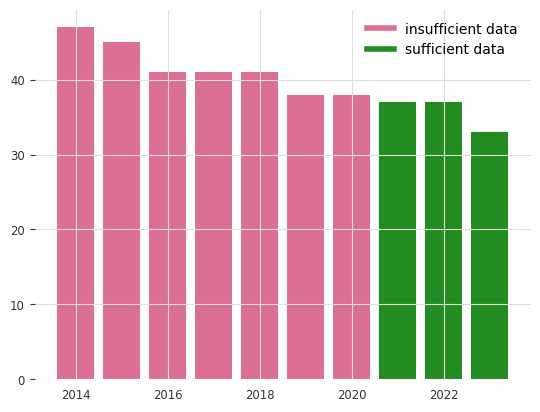

In [16]:
import matplotlib.pyplot as plt
color = ['lightblue', 'blue', 'purple', 'red', 'black']

color = []

for year in count_data_df['year']:
    
    if year <= 2020:
        color.append('palevioletred')
    else:
        color.append('forestgreen')


# Create bars
fig, ax = plt.subplots()
ax.bar(count_data_df['year'], count_data_df['count'],
       color=color,
       linewidth=1)
# Create custom legend
legend_labels = {'palevioletred': 'insufficient data', 'forestgreen': 'sufficient data'}
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_labels.keys()]
labels = [legend_labels[color] for color in legend_labels.keys()]
ax.legend(handles, labels)
# Show graph
plt.show()

In [17]:
transpose_pivot_subset = transpose_pivot[[x for x in transpose_pivot.columns if x < 2021]] 

In [18]:
transpose_pivot_subset.dropna(inplace=True)
brokers = transpose_pivot_subset.reset_index()['Broker']

/tmp/ipykernel_1895/607667974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transpose_pivot_subset.dropna(inplace=True)


### Brokers Target Data

In [19]:
full_data = pd.read_excel('../data/Actualandtarget_1401_10.xlsx')

In [20]:
filtered_data = full_data[full_data['Broker'].isin(brokers)]

In [21]:
filtered_data

ProfId             Broker  FiscalYear     Actuals  BrokerTarget
0     16507  Weatherby, Samuel        2014   637791.99      500000.0
1     16507  Weatherby, Samuel        2015  1043269.72      600000.0
2     16507  Weatherby, Samuel        2016   576363.95     1633334.0
3     16507  Weatherby, Samuel        2017   683077.75      600000.0
4     16507  Weatherby, Samuel        2018  1662274.72      850000.0
..      ...                ...         ...         ...           ...
446  192406      Sheehy, Ahnie        2019   500000.00           NaN
447  192406      Sheehy, Ahnie        2020   303459.66           NaN
448  192406      Sheehy, Ahnie        2021   217530.65      500000.0
449  192406      Sheehy, Ahnie        2022   488972.28      900000.0
450  192406      Sheehy, Ahnie        2023   126778.85           NaN

[373 rows x 5 columns]

In [22]:
filtered_data_pivot_table = pd.pivot(filtered_data, index = 'FiscalYear', columns='Broker', values='BrokerTarget').transpose().reset_index()

In [23]:
filtered_data_pivot_table.to_excel('../data/filtered_broker_target.xlsx',index=False)

In [24]:
null_count = filtered_data_pivot_table.isna().sum()
null_count = null_count.reset_index()
null_count = null_count.rename(columns={0:'Count'})

In [25]:
null_count

FiscalYear  Count
0      Broker      0
1        2014      5
2        2015      0
3        2016      0
4        2017      0
5        2018      1
6        2019     37
7        2020     19
8        2021     32
9        2022     22
10       2023     16

In [26]:
# plt.bar(x=null_count['FiscalYear'], height=null_count['Count'], color = 'darkgreen')
# plt.title('Number of null values in the BrokerTarget')
# plt.show()

([<matplotlib.patches.Wedge at 0x71d3a1d859f0>,
 [Text(1.1, 0.0, 'Broker'),
  Text(1.0922206726774804, 0.13059097279656146, '2014'),
  Text(1.0689927233164507, 0.2593348366426671, '2015'),
  Text(1.0689927233164507, 0.2593348366426671, '2016'),
  Text(1.0689927233164507, 0.2593348366426671, '2017'),
  Text(1.062518406696673, 0.28470095790278555, '2018'),
  Text(0.43301522850248725, 1.0111863388539912, '2019'),
  Text(-0.8805953678222178, 0.6592054294148776, '2020'),
  Text(-0.9253788759906101, -0.5947049149539251, '2021'),
  Text(0.309905870917812, -1.0554422538304369, '2022'),
  Text(1.0212047599553087, -0.4088286172036159, '2023')])

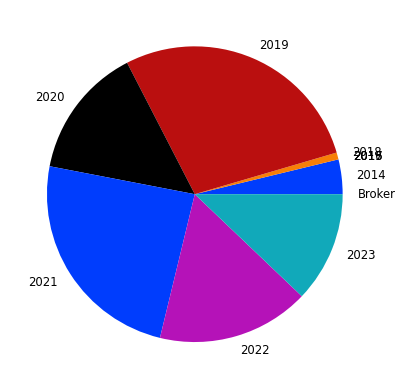

In [27]:
plt.pie(null_count['Count'], labels=null_count['FiscalYear'])

In [28]:
pd.Timestamp(cutoff_year)

Timestamp('2022-01-01 00:00:00')

In [29]:
transpose = pivot_table.transpose()

In [30]:
transpose.reset_index(inplace=True)

In [31]:
transpose

FiscalYear               Broker       2014       2015       2016        2017  \
0               Algrim, Phillip   54327.00   85560.54        NaN         NaN   
1                 Altman, Cribb        NaN        NaN        NaN         NaN   
2                 Andrew, Megan        NaN        NaN        NaN         NaN   
3              Angelle, Tiffany        NaN        NaN        NaN         NaN   
4           Ankenbrand, Kimarie  448814.94  886525.48  513090.78  1293516.03   
..                          ...        ...        ...        ...         ...   
149               Wright, Chris        NaN        NaN        NaN         NaN   
150                 Wyse, Henry        NaN        NaN        NaN         NaN   
151               Yoakam, Coler        NaN        NaN        NaN         NaN   
152             garner, michael        NaN        NaN        NaN         NaN   
153              mccartin, mary        NaN        NaN        NaN         NaN   

FiscalYear        2018      2019       2020        2021        2022  \
0                  NaN       NaN        NaN         NaN         NaN   
1                  NaN       NaN        NaN   598664.08  1688739.14   
2                  NaN  24413.30  161728.98   517348.12   480929.23   
3                  NaN       NaN        NaN         NaN   159242.61   
4           1022890.53  67984.06      33.90         NaN         NaN   
..                 ...       ...        ...         ...         ...   
149                NaN       NaN        NaN   137344.44   943481.20   
150                NaN       NaN        NaN         NaN        0.00   
151                NaN       NaN        NaN         NaN         NaN   
152                NaN       NaN  213333.25  1059929.20  1464745.68   
153                NaN       NaN        NaN         NaN    31675.64   

FiscalYear        2023  
0                  NaN  
1           1365978.45  
2                 0.02  
3            500000.00  
4                  NaN  
..                 ...  
149          818594.54  
150          293149.93  
151               0.00  
152              -0.01  
153          404628.89  

[154 rows x 11 columns]

In [32]:
clean_data = pivot_table.dropna(axis=1)

In [33]:
len(clean_data.columns)

33

In [34]:
len(pivot_table.columns)

154

In [35]:
clean_data.reset_index(inplace=True)

In [36]:
clean_data["FiscalYear"] = pd.to_datetime(clean_data["FiscalYear"], format="%Y")

/tmp/ipykernel_1895/4100552494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["FiscalYear"] = pd.to_datetime(clean_data["FiscalYear"], format="%Y")


In [37]:
clean_data

Broker FiscalYear  Armstrong, Brooke  Breen, Daniel  Cosby, Russell  \
0      2014-01-01         1380583.55      171398.16       770342.33   
1      2015-01-01          631544.09     2194829.40       463416.90   
2      2016-01-01         1125976.16     1492879.42      1897362.90   
3      2017-01-01         1526556.11     2425068.14       216952.35   
4      2018-01-01         1786851.61     1557403.06      1035997.29   
5      2019-01-01         2927638.63     1966813.19      2630950.86   
6      2020-01-01         2774229.05      694513.79        85726.02   
7      2021-01-01         1521039.35     1176575.40      1734397.73   
8      2022-01-01          138760.99      243170.51       262885.16   
9      2023-01-01          -10737.07      427007.70        15142.76   

Broker  Curry, Ashley  Darrow, Terry  Eckert, Jeff  Esquivel, James  \
0            88839.39     1003383.83     750000.05        750000.01   
1           335981.55      815760.82     997785.67        997785.62   
2           401767.00      360931.29     995381.26        990905.52   
3           267907.45      588227.17     812467.24        807640.25   
4           506123.66      429284.82     939797.56        939452.24   
5           393480.17      500000.00     610360.97        610355.66   
6           226290.45       69027.42     555576.34        555576.49   
7           529705.03      890021.64    1162108.21       1121160.16   
8           557611.48      240795.18    1101099.99       1071926.24   
9           592223.29        9041.67     986421.71        846948.54   

Broker  Forkner, Fiona  Haggar, James  ...  Selner, Bradley  Sheehy, Ahnie  \
0            384698.30      301113.55  ...       3188933.63         151.72   
1            998910.44      525300.89  ...       2209823.93      142877.89   
2           1301178.85      641300.49  ...       2076925.86      218536.00   
3            665690.49      533198.91  ...       2135517.42      333502.62   
4            701267.31      540839.62  ...        837927.59      394708.13   
5            589002.22      776827.65  ...       3435213.05      500000.00   
6            585002.05      765932.58  ...       5020462.00      303459.66   
7            334546.52      293815.62  ...       3908492.32      217530.65   
8            750000.00     1310808.71  ...       4545074.40      488972.28   
9           1319272.27     2250000.00  ...       2703434.77      126778.85   

Broker  Shipley, Christopher  Smith, Jubal  Stout, Christopher  \
0                  356160.84    1771504.76           102575.75   
1                  633904.48    7359378.40           250876.09   
2                  808734.66    2113433.76           439799.56   
3                 1325188.67    1495679.59           439281.72   
4                 1221506.39    1477429.31           439691.67   
5                  875584.42    9027557.98           837256.10   
6                 1030727.50    1858116.40           729262.65   
7                 1382872.15    4769175.02           888623.37   
8                 3319633.14     584342.95           900358.85   
9                 1530226.11     758521.60          1331616.06   

Broker  Taguwa, Andrew  Toon, Larry  Weatherby, Samuel  Whitman, Paul  \
0            901100.59   2259899.50          637791.99     1562838.05   
1           1011467.41    983978.26         1043269.72     1997295.13   
2            714371.11     68855.76          576363.95     1207541.71   
3            998930.30   7801514.26          683077.75      363890.00   
4           1171395.37    543049.64         1662274.72      947842.79   
5            500000.00    563242.34          542493.41      798450.78   
6            826222.42    204838.14          128476.25     1288304.98   
7            650988.56   3920452.28          513034.18     1154146.70   
8           1277070.87     26433.64          559862.94      363262.31   
9           1417720.02     26137.89         1128375.68      334568.10   

Broker  Wood, Alan  
0        856670.45  
1   

In [38]:
series = TimeSeries.from_dataframe(clean_data, time_col="FiscalYear")

In [45]:
name1 = series['Armstrong, Brooke']


In [51]:
name_df = name1.pd_dataframe()

In [59]:
import pandas as pd

# Sample DataFrame
data = {
    'Predicted Target ($)': [572929.3398, 647138.1216],
    'lower': [-56270.6602, 17938.1216],
    'upper': [1202129.3398, 1276338.1216]
}
index = pd.to_datetime(['2024-01-01', '2025-01-01'])
df = pd.DataFrame(data, index=index)

# Function to apply color to the 'Predicted Target ($)' column
def color_predicted(val):
    return 'color: red'

# Function to apply color to the 'lower' and 'upper' columns
def color_lower_upper(val):
    return 'color: green'

# Applying styles to the DataFrame
styled_df = df.style.applymap(color_predicted, subset=['Predicted Target ($)'])\
                    .applymap(color_lower_upper, subset=['lower', 'upper'])\
                    .set_table_styles([
                        {'selector': 'th', 'props': [('background-color', '#2C2E3E')]}
                    ])

# Display the styled DataFrame
styled_df


/tmp/ipykernel_1895/4088407099.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(color_predicted, subset=['Predicted Target ($)'])\


In [ ]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.map(style_negative, props='color:red;')\
              .map(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

In [54]:
name_df[['upper','lower']] = [name_df['Armstrong, Brooke'].values, name_df['Armstrong, Brooke'].values]

ValueError: Columns must be same length as key

In [40]:
name2 = name1 - 10000
name3 = name1 + 10000

In [41]:
name2 = name2.with_columns_renamed('Armstrong, Brooke', 'lower')
name3 = name3.with_columns_renamed('Armstrong, Brooke', 'upper')

In [42]:
temp = name1.stack(name2.stack(name3))

In [43]:
temp.pd_dataframe()

component   Armstrong, Brooke       lower       upper
FiscalYear                                           
2014-01-01         1380583.55  1370583.55  1390583.55
2015-01-01          631544.09   621544.09   641544.09
2016-01-01         1125976.16  1115976.16  1135976.16
2017-01-01         1526556.11  1516556.11  1536556.11
2018-01-01         1786851.61  1776851.61  1796851.61
2019-01-01         2927638.63  2917638.63  2937638.63
2020-01-01         2774229.05  2764229.05  2784229.05
2021-01-01         1521039.35  1511039.35  1531039.35
2022-01-01          138760.99   128760.99   148760.99
2023-01-01          -10737.07   -20737.07     -737.07

In [44]:
temp['ci'] = temp[['lower', 'upper']].apply(lambda row: (row['lower'], row['upper']), axis=1)


AttributeError: 'TimeSeries' object has no attribute 'apply'

In [ ]:
temp

component   Armstrong, Brooke       lower       upper  \
FiscalYear                                              
2014-01-01         1380583.55  1370583.55  1390583.55   
2015-01-01          631544.09   621544.09   641544.09   
2016-01-01         1125976.16  1115976.16  1135976.16   
2017-01-01         1526556.11  1516556.11  1536556.11   
2018-01-01         1786851.61  1776851.61  1796851.61   
2019-01-01         2927638.63  2917638.63  2937638.63   
2020-01-01         2774229.05  2764229.05  2784229.05   
2021-01-01         1521039.35  1511039.35  1531039.35   
2022-01-01          138760.99   128760.99   148760.99   
2023-01-01          -10737.07   -20737.07     -737.07   

component                                ci  
FiscalYear                                   
2014-01-01         (1370583.55, 1390583.55)  
2015-01-01           (621544.09, 641544.09)  
2016-01-01         (1115976.16, 1135976.16)  
2017-01-01         (1516556.11, 1536556.11)  
2018-01-01         (1776851.61, 1796851.61)  
2019-01-01         (2917638.63, 2937638.63)  
2020-01-01         (2764229.05, 2784229.05)  
2021-01-01         (1511039.35, 1531039.35)  
2022-01-01  (128760.98999999999, 148760.99)  
2023-01-01  (-20737.07, -737.0699999999997)

<Axes: xlabel='FiscalYear'>

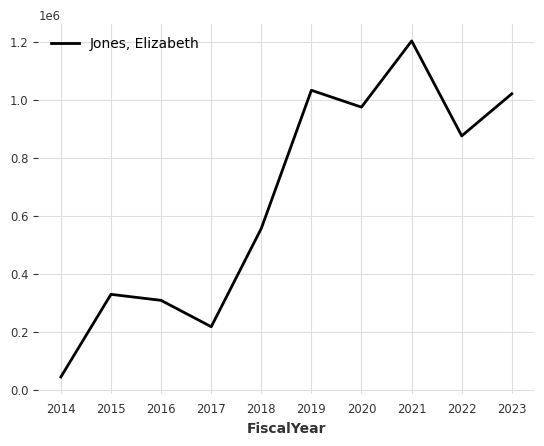

In [ ]:
import random

name = random.choice(clean_data.columns[1:])
series[name].plot()

In [ ]:
train_series, val_series = series.split_before(pd.Timestamp(cutoff_year))

In [ ]:
scaler = Scaler()
training_scaled = scaler.fit_transform(train_series[name])
validation_scaled = scaler.transform(val_series[name])

In [ ]:
from darts.models import NaiveMovingAverage

In [ ]:
moving_average = NaiveMovingAverage(input_chunk_length=3)
moving_average.fit(training_scaled[name])
prediction = moving_average.predict(4)

<Axes: xlabel='FiscalYear'>

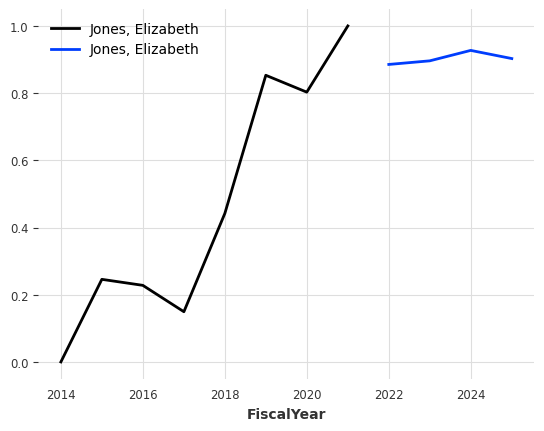

In [ ]:
training_scaled[name].plot()
prediction.plot()

In [ ]:
rmse(validation_scaled[name], prediction)

0.12465067457372678

In [ ]:
from darts.utils.utils import ModelMode

In [ ]:
es = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=None)
es.fit(training_scaled[name])
prediction = es.predict(2)


In [ ]:
validation_scaled[name]

<TimeSeries (DataArray) (FiscalYear: 2, component: 1, sample: 1)> Size: 16B
array([[[0.71735436]],

       [[0.84267568]]])
Coordinates:
  * FiscalYear  (FiscalYear) datetime64[ns] 16B 2022-01-01 2023-01-01
  * component   (component) object 8B 'Jones, Elizabeth'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
prediction

<TimeSeries (DataArray) (FiscalYear: 2, component: 1, sample: 1)> Size: 16B
array([[[0.69857234]],

       [[0.73721891]]])
Coordinates:
  * FiscalYear  (FiscalYear) datetime64[ns] 16B 2022-01-01 2023-01-01
  * component   (component) object 8B 'Haggar, James'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
scaler.inverse_transform(prediction)

<TimeSeries (DataArray) (FiscalYear: 2, component: 1, sample: 1)> Size: 16B
array([[[631234.46632757]],

       [[649901.22355446]]])
Coordinates:
  * FiscalYear  (FiscalYear) datetime64[ns] 16B 2022-01-01 2023-01-01
  * component   (component) object 8B 'Haggar, James'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
scaler.inverse_transform(validation_scaled)

<TimeSeries (DataArray) (FiscalYear: 2, component: 1, sample: 1)> Size: 16B
array([[[1310808.71]],

       [[2250000.  ]]])
Coordinates:
  * FiscalYear  (FiscalYear) datetime64[ns] 16B 2022-01-01 2023-01-01
  * component   (component) object 8B 'Haggar, James'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='FiscalYear'>

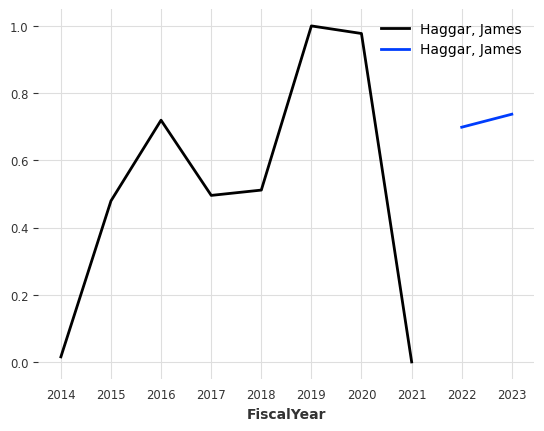

In [ ]:
training_scaled[name].plot()
prediction.plot()

In [ ]:
rmse(validation_scaled[name], prediction)

2.5449786676881385

In [ ]:
rf = RandomForest(lags=4, n_estimators=10)
rf.fit(training_scaled[name])
prediction = rf.predict(2024 - int(cutoff_year))
rf_score = rmse(validation_scaled[name], prediction)
rf_score

2.552313322319344

def get_score(name, training_scaled, validation_scaled):

    score = {}

    # baseline 
    moving_average = NaiveMovingAverage(input_chunk_length=3)
    moving_average.fit(training_scaled[name])
    prediction = moving_average.predict(2024 - int(cutoff_year))

    moving_average_score = rmse(validation_scaled[name], prediction)
    score["MovingAverage"] = moving_average_score

    # statistical 
    es = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=None)
    es.fit(training_scaled[name])
    prediction = es.predict(2024 - int(cutoff_year))


    es_score = rmse(validation_scaled[name], prediction)
    score["ExponentialSmoothing"] = es_score


    # ml
    rf = RandomForest(lags=4, n_estimators=10)
    rf.fit(training_scaled[name])
    prediction = rf.predict(2024 - int(cutoff_year))
    rf_score = rmse(validation_scaled[name], prediction)
    
    score["RandomForest"] = rf_score

    # dl

    nhits = NHiTSModel(
    input_chunk_length=3,
    output_chunk_length=4,
    num_blocks=2,
    n_epochs=5,
)
    nhits.fit(training_scaled[name])
    prediction = nhits.predict(2024 - int(cutoff_year))
    nhits_score = rmse(validation_scaled[name], prediction)
    score["NHiTS"] = nhits_score


    return score
    



In [ ]:
from darts.metrics.metrics import mape

In [ ]:
def get_mape_score(training, validation):

    score = {}
    scaler = Scaler()
    training_scaled = scaler.fit_transform(training)
    validation_scaled = scaler.transform(validation)

    # baseline 
    moving_average = NaiveMovingAverage(input_chunk_length=3)
    moving_average.fit(training_scaled)
    prediction_ma = moving_average.predict(2024 - int(cutoff_year))

    
    prediction_inverse_scale = scaler.inverse_transform(prediction_ma)
    moving_average_score = mape(validation, prediction_inverse_scale)
    score["MovingAverage"] = moving_average_score

    # statistical 
    es = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=None)
    es.fit(training_scaled[name])
    prediction_es = es.predict(2024 - int(cutoff_year))


    prediction_inverse_scale_es = scaler.inverse_transform(prediction_es)
    es_score = mape(validation, prediction_inverse_scale_es)
    score["ExponentialSmoothing"] = es_score


    # ml
    rf = RandomForest(lags=4, n_estimators=10)
    rf.fit(training_scaled[name])
    prediction_rf = rf.predict(2024 - int(cutoff_year))

    prediction_inverse_scale_rf = scaler.inverse_transform(prediction_rf)
    rf_score = mape(validation, prediction_inverse_scale_rf)
    score["RandomForest"] = rf_score

    # dl

    nhits = NHiTSModel(
    input_chunk_length=3,
    output_chunk_length=4,
    num_blocks=2,
    n_epochs=5,
)
    nhits.fit(training_scaled[name])
    prediction_nhits = nhits.predict(2024 - int(cutoff_year))

    prediction_inverse_scale_nhits = scaler.inverse_transform(prediction_nhits)
    nhits_score = mape(validation, prediction_inverse_scale_nhits)
    score["NHiTS"] = nhits_score

    


    
    training.plot()
    validation.plot(label='Validate')
    
    prediction_inverse_scale_es.plot(label='es')
    prediction_inverse_scale_rf.plot(label='rf')
    prediction_inverse_scale_nhits.plot(label='nhits')

    return score

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 21.64it/s, train_loss=0.211] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 19.88it/s, train_loss=0.211]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 81.83it/s] 


{'MovingAverage': 14.157280430617476,
 'ExponentialSmoothing': 48.71800616359019,
 'RandomForest': 14.957390420333082,
 'NHiTS': 69.90074214891096}

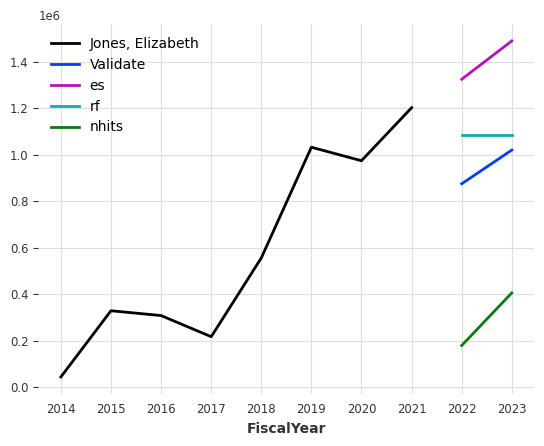

In [ ]:
get_mape_score(train_series[name], val_series[name])

In [ ]:
scores

{'MovingAverage': 2.680774222710387,
 'ExponentialSmoothing': 2.5449786676881385,
 'RandomForest': 2.552313322319344,
 'NHiTS': 1.648369800408696}

In [ ]:
moving_average_list = []
exponential_smoothing_list = []
rf_list = []
nhits_list = []
for name in clean_data.columns[1:]:

    scaler = Scaler()
    training_scaled = scaler.fit_transform(train_series[name])
    validation_scaled = scaler.transform(val_series[name])
    scores = get_score(name, training_scaled, validation_scaled)

    moving_average_list.append(scores['MovingAverage'])
    exponential_smoothing_list.append(scores['ExponentialSmoothing'])
    rf_list.append(scores['RandomForest'])
    nhits_list.append(scores['NHiTS'])
    

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.12it/s, train_loss=0.235] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.09it/s, train_loss=0.235]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 148.43it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 37.35it/s, train_loss=0.0784]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.20it/s, train_loss=0.0784]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 152.83it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.40it/s, train_loss=0.0647]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 22.61it/s, train_loss=0.0647]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 152.24it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.57it/s, train_loss=0.0674]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.37it/s, train_loss=0.0674]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 148.68it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.54it/s, train_loss=0.162]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.34it/s, train_loss=0.162]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 109.60it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.11it/s, train_loss=0.101]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 30.71it/s, train_loss=0.101]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 140.98it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 33.58it/s, train_loss=0.124]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 30.41it/s, train_loss=0.124]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 140.30it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 2:   0%|          | 0/1 [00:00<?, ?it/s, train_loss=1.050]         

Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.26it/s, train_loss=0.124]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 30.54it/s, train_loss=0.124]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.06it/s, train_loss=0.0411]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.00it/s, train_loss=0.0411]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 129.64it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 37.79it/s, train_loss=0.145]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.70it/s, train_loss=0.145]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 148.54it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.14it/s, train_loss=0.252]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.06it/s, train_loss=0.252]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 143.10it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.13it/s, train_loss=0.231] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.49it/s, train_loss=0.231]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 130.67it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.09it/s, train_loss=0.0322]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.27it/s, train_loss=0.0322]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 108.52it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 25.28it/s, train_loss=0.310] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 23.52it/s, train_loss=0.310]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 83.30it/s] 


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.21it/s, train_loss=0.211] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.12it/s, train_loss=0.211]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 102.76it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 31.78it/s, train_loss=0.181]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 29.94it/s, train_loss=0.181]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.96it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.51it/s, train_loss=0.216] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.97it/s, train_loss=0.216]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 146.93it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 33.96it/s, train_loss=0.219]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 30.95it/s, train_loss=0.219]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 145.84it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.39it/s, train_loss=0.279] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.63it/s, train_loss=0.279]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 100.98it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.94it/s, train_loss=0.0512]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 30.58it/s, train_loss=0.0512]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 136.25it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.45it/s, train_loss=0.0982]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.62it/s, train_loss=0.0982]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 147.10it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.26it/s, train_loss=0.286]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.53it/s, train_loss=0.286]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 149.80it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 37.92it/s, train_loss=0.135]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.20it/s, train_loss=0.135]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 134.08it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.38it/s, train_loss=0.162]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.43it/s, train_loss=0.162]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 140.94it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.50it/s, train_loss=0.047]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.27it/s, train_loss=0.047]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 151.43it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.34it/s, train_loss=0.0844]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.32it/s, train_loss=0.0844]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 162.65it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 18.30it/s, train_loss=0.0407]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 17.66it/s, train_loss=0.0407]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 134.30it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 37.20it/s, train_loss=0.170] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.19it/s, train_loss=0.170]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 150.58it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 38.79it/s, train_loss=0.139]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 36.67it/s, train_loss=0.139]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 149.49it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.42it/s, train_loss=0.0813]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 32.82it/s, train_loss=0.0813]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 131.59it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 34.02it/s, train_loss=0.156]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 31.51it/s, train_loss=0.156]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.94it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 26.42it/s, train_loss=0.101]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s, train_loss=0.101]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 130.67it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 1.6 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
1.5 K     Non-trainable params
1.6 M     Total params
6.423     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 35.67it/s, train_loss=0.112]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 33.43it/s, train_loss=0.112]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 109.93it/s]


In [ ]:
sum(moving_average_list)

19.517750220208523

In [ ]:
print(f"the aveage score of moving average is {round(sum(moving_average_list)/len(moving_average_list),3)}")
print(f"the aveage score of exponential Smoothing is {round(sum(exponential_smoothing_list)/len(exponential_smoothing_list),3)}")
print(f"the aveage score of random forest is {round(sum(rf_list)/len(rf_list),3)}")
print(f"the aveage score of nhits is {round(sum(nhits_list)/len(nhits_list),3)}")


the aveage score of moving average is 0.591
the aveage score of exponential Smoothing is 0.572
the aveage score of random forest is 0.593
the aveage score of nhits is 0.74
